In [1]:
# On importe les librairies dont on aura besoin pour la Question1
import os
from utils import *
from tsne import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn import preprocessing
from matplotlib.pyplot import figure
import matplotlib
import webcolors
from webcolors import *

In [2]:
#------------Task_0: Chargement et normalisation des donnees----------------------------------------#

#chargement des donnee
hdr_data = load_HDR_data()
country_names = hdr_data["country_names"]
data = hdr_data["X"]

data_scaled = preprocessing.scale(data)
data_2D = tsne(data_scaled, perplexity = 20)
data_scaled

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point  0  of  138 ...
Mean value of sigma:  3.213978289678509
Iteration  10 : error is  11.895532995238957
Iteration  20 : error is  11.462295839134024
Iteration  30 : error is  11.97223261064925
Iteration  40 : error is  12.604483414117826
Iteration  50 : error is  12.74276303665906
Iteration  60 : error is  12.572678766513357
Iteration  70 : error is  12.585135283284378
Iteration  80 : error is  12.373739298600771
Iteration  90 : error is  12.64655353369229
Iteration  100 : error is  12.676261801328414
Iteration  110 : error is  1.8078931255406157
Iteration  120 : error is  1.4723570297226969
Iteration  130 : error is  1.2401682721266782
Iteration  140 : error is  1.094478697128493
Iteration  150 : error is  0.9499300002354975
Iteration  160 : error is  0.8015561282900097
Iteration  170 : error is  0.678591044058991
Iteration  180 : error is  0.5185735437070303
Iteration  190 : error is  0.5462

array([[-1.03635537e+00, -6.65934742e-01, -3.70435382e-01, ...,
         2.44426139e+00, -7.97354834e-01, -7.79256302e-01],
       [-6.14476193e-01, -3.63635418e-01, -3.46825516e-01, ...,
         4.24004528e-01, -7.97354834e-01, -7.79256302e-01],
       [-3.61348687e-01, -1.62102536e-01, -3.65713409e-01, ...,
         1.39672080e+00, -7.97354834e-01, -7.79256302e-01],
       ...,
       [ 7.35537174e-01,  1.75245985e+00, -3.27937623e-01, ...,
        -3.99063085e-01,  4.62026716e-01,  1.94952978e-01],
       [ 3.13657997e-01,  1.14786120e+00,  7.10691196e-02, ...,
        -3.99063085e-01,  1.02293026e-03,  7.40690583e-01],
       [ 1.24179219e+00,  2.05475917e+00, -3.13771703e-01, ...,
        -3.99063085e-01,  3.92554311e-01,  1.16023985e-01]])

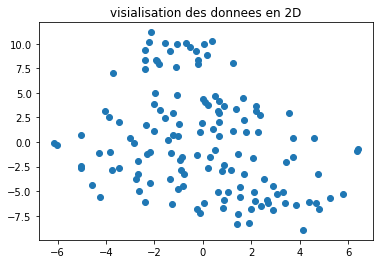

In [3]:
#construction du graphe pour visualiser les données 2D
plt.scatter(data_2D[:,0],data_2D[:,1], label='True Position')
plt.title("visialisation des donnees en 2D")
plt.savefig('../doc/Graphes/visialisation_des_donne_en_2D.png',dpi=200)
plt.show()

In [4]:
#-----------task_1: regroupement des instances en ++ groupes: choix du meilleur clustering-----------------#

#----task_1.1 :essayer et choix du clustering qui fait le plus de sens------#

#on choisi k=5 clustering
k=5

cluster_classe = {} # vas stocker les ID de claque cluster avec la liste des pays appartenant a chaque cluster
for i in range(0,k):
    cluster_classe[i] = []

k=5
kmeans = KMeans(n_clusters=k)
kmeans.fit(data_2D)

#pour chaque cluster, je stocke la liste des pays associé
for i in range(0, len(kmeans.labels_) ):
    cp_liste=[]
    key=kmeans.labels_[i]
    cp_liste = cluster_classe[key]
    cp_liste.append(country_names[i])
    cluster_classe[key] = cp_liste

print("\n","#"*32,"Nombre de cluster= ", k, "#"*33, "\n|"," "*85,"|")
centroides, index_centroides = find_closest_instances_to_kmeans(data_2D, kmeans)

li = 109
with open('../doc/Graphes/data_task_1_k='+str(k)+'_Means.txt', 'w') as fichier:
    fichier.write(' '*8 +'Repartition des pays dans '+str(k)+' cluster \n\n+'+"-"*li +"+\n")
    fichier.write("|Cluster_ID |couleur "+" "*3 +"| Taille | Nom Centroide"+" "*10 +" | liste Pays "+" "*38 +"|\n+" +"-"*li +"+\n" )
        

#on affiche les centroïdes de chaque cluster + le code de couleur associer
for i in range(0, len(index_centroides) ):
    na = index_centroides[i]
        
    colore_hex=matplotlib.colors.to_hex( RGB_color(kmeans.labels_[na], k) )
    color_RGB= hex_to_rgb (colore_hex)
    
    #'get_colour_name' donne une approximation du nom de couleur la plus proche de celle sur l'image
    actual_name, colore_name = get_colour_name(color_RGB)
    
    with open('../doc/Graphes/data_task_1_k='+str(k)+'_Means.txt', 'a') as fichier:
        fichier.write("\n|%8s   |%11s|%6s  |%25s|  %50s|" % (i+1,colore_name,len(cluster_classe[i]),country_names[na], cluster_classe[i])+"\n+" +"-"*li +"+")
  
        
    print ("| %25s -> centroïdes associer au Cluter N*:%2s color=(%11s)  |" %(country_names[na] ,i+1, colore_name) )
    


 ################################ Nombre de cluster=  5 ################################# 
|                                                                                       |
|                  Colombia -> centroïdes associer au Cluter N*: 1 color=(       navy)  |
|                   Algeria -> centroïdes associer au Cluter N*: 2 color=( dodgerblue)  |
|                   Austria -> centroïdes associer au Cluter N*: 3 color=(  turquoise)  |
|                  Thailand -> centroïdes associer au Cluter N*: 4 color=(greenyellow)  |
|                      Mali -> centroïdes associer au Cluter N*: 5 color=(  orangered)  |


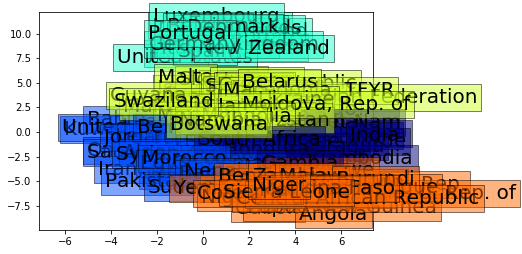

In [5]:
#----task_1.2 : graphe réduit pour visualiser sur l'écran d'ordinateur.
show_annotated_clustering(data_2D, kmeans.labels_, country_names)
plt.savefig('../doc/Graphes/visialisation_des_donne_pour_k_fixer_a_4.png',dpi=200)


 ################################## __pour k =  2 __ #################################### 
|                                                                                       |
|                  Slovenia -> centroïdes associer au Cluter N*: 1 color=(       navy)  |
|                   Bolivia -> centroïdes associer au Cluter N*: 2 color=( lightgreen)  |

 ################################## __pour k =  3 __ #################################### 
|                                                                                       |
|                   Bolivia -> centroïdes associer au Cluter N*: 1 color=(       navy)  |
|                    Cyprus -> centroïdes associer au Cluter N*: 2 color=(deepskyblue)  |
|                   Austria -> centroïdes associer au Cluter N*: 3 color=(       gold)  |

 ################################## __pour k =  4 __ #################################### 
|                                                                                       |
|   

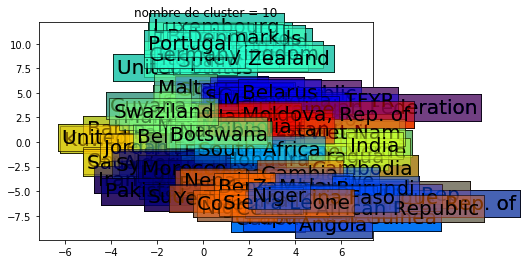

In [6]:
#-------task_2 :regrouper des données HDR avec l'algorithme k-means pour k = [2,10]. 
    
SSE = []
for cluster in range(2,11):
    
    cluster_classe = {} # vas stocker les ID de claque cluster avec la liste des noms de pays appartenant a chaque cluster
    for i in range(0,cluster):
        cluster_classe[i] = []
        
    clusterID_pays = {} # vas stocker les ID de claque cluster avec la liste des iD de pays appartenant a chaque cluster
    for i in range(0,cluster):
        clusterID_pays[i] = []
    
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_2D)
    SSE.append(kmeans.inertia_)
     
    #pour chaque cluster, je stocke la liste des pays associé
    for i in range(0, len(kmeans.labels_) ):
        key=kmeans.labels_[i]
        
        cp_liste=[]
        cp_liste = cluster_classe[key]
        cp_liste.append(country_names[i])
        cluster_classe[key] = cp_liste
        
        ID_liste=[] #### ajoute recent#####
        ID_liste = clusterID_pays[key] #### ajoute recent#####
        ID_liste.append(i) #### ajoute recent#####
        clusterID_pays[key] = ID_liste #### ajoute recent#####
        

        
    
    show_annotated_clustering(data_2D, kmeans.labels_, country_names)
    plt.title("nombre de cluster = "+ str(cluster))
    print("\n","#"*34,"__pour k = ", cluster,"__", "#"*36, "\n|"," "*85,"|")
    plt.savefig('../doc/Graphes/'+str(cluster)+'_Means.png',dpi=200)
    
    centroides, index_centroides = find_closest_instances_to_kmeans(data_2D, kmeans)
    
    li = 109
    with open('../doc/Graphes/data_'+str(cluster)+'_Means.txt', 'w') as fichier:
        fichier.write(' '*8 +'Repartition des pays dans '+str(cluster)+' cluster \n\n+'+"-"*li +"+\n")
        fichier.write("|Cluster_ID |couleur "+" "*3 +"| Taille | Nom Centroide"+" "*10 +" | liste Pays "+" "*38 +"|\n+" +"-"*li +"+\n" )
            
    for i in range(0, len(index_centroides) ):
        na = index_centroides[i]
        
        #je determine le nom de la couleur assicier a chaque cluster
        colore_hex=matplotlib.colors.to_hex( RGB_color(kmeans.labels_[na], cluster) )
        color_RGB= hex_to_rgb (colore_hex)
        actual_name, colore_name = get_colour_name(color_RGB)
        
        #je souvegarde la liste des pays par cluster dans un fichier .txt
        with open('../doc/Graphes/data_'+str(cluster)+'_Means.txt', 'a') as fichier:
            fichier.write("\n|%8s   |%11s|%6s  |%25s|  %50s|" % (i+1,colore_name,len(cluster_classe[i]),country_names[na], cluster_classe[i])+"\n+" +"-"*li +"+")
  
        print ("| %25s -> centroïdes associer au Cluter N*:%2s color=(%11s)  |" %(country_names[na] ,i+1, colore_name) )
    
    
    x,y =data_scaled.shape
    precision=0.5
    stat = {}
    li= 27+(8*cluster)

    AllStat={}
    for i in range(0,y):
        AllStat[i] = []
        
    for i in range(0, len(clusterID_pays) ): #pour chaque cluster
        premier= clusterID_pays[i][0]
        valeur = data_scaled[premier]
        for j in range(0, y):#pour chaque caracteristique
            index =0
            for k in range(0, len(clusterID_pays[i]) ): #pour chaque pays
                pays=clusterID_pays[i][k]
                if (data_scaled[pays][j]>=valeur[j]-precision) and (data_scaled[pays][j]<=valeur[j]+precision):
                    index=index+1
        
            stat[j]=index
    
        for m in range(0, len(stat) ): #pour chaque 
            car_liste=[]
            car_liste = AllStat[m]
            car_liste.append(stat[m])

    with open('../doc/Graphes/data_'+str(cluster)+'_Means.txt', 'a') as fichier:
        fichier.write('\n\n'*3 +' '*8 +'estimation du niveau de proximiter entre les pays en fonction des caractiristique   \n\n+'+"-"*li +"+\n")
        fichier.write("|indicator_names "+" "*11 +"| Nombre de pays/cluster ayant des valeur \n| "+" "*26 +"|  de caracteristique proche \n+" +"-"*li +"+" )
        fichier.write("\n|" +" "*27 + "| Cluster_ID" +" "*(li-39) +"| \n|" +"-"*li +"+ \n|"+" "*27)
        for i in range(0, len(clusterID_pays)):
            fichier.write("|%6s " % (i+1))
        fichier.write("|\n#" +"#"*li +"#")

        for m in range(0, len(AllStat) ):
            fichier.write("\n|%2s %23s " % (m,hdr_data['indicator_names'][m]))
            for i in range(0, cluster):
                fichier.write("|%6s " % (AllStat[m][i]))
            fichier.write("|\n+" +"-"*li +"+")

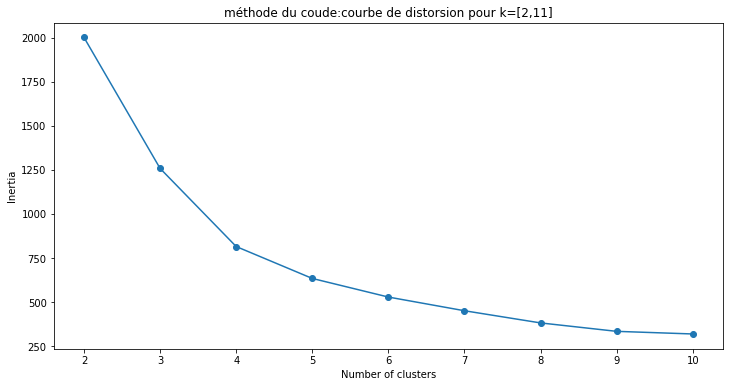

In [7]:
# affiche les résultats stocker dans la variable SSE en fonction de K
frame = pd.DataFrame({'Cluster':range(2,11), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title("méthode du coude:courbe de distorsion pour k=[2,11]")
plt.savefig('../doc/Graphes/methode_du_coude_courbe_de_distorsion.png',dpi=200)

In [8]:
len (clusterID_pays)

10

In [9]:
clusterID_pays

{0: [34, 42, 70, 73, 74, 77, 81, 85, 89, 95, 97, 104, 109],
 1: [25, 28, 31, 33, 36, 37, 38, 40, 41, 45, 49, 52, 53, 54, 61],
 2: [98,
  105,
  108,
  110,
  112,
  113,
  117,
  120,
  122,
  123,
  124,
  128,
  129,
  130,
  131,
  132,
  134,
  135,
  137],
 3: [32, 39, 44, 55, 56, 57, 66, 67, 68, 72, 75, 80, 86, 94, 96],
 4: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  26],
 5: [21, 22, 23, 24, 27, 29, 46, 47, 50, 51, 71, 76, 82, 99, 102, 115],
 6: [65, 79, 84, 87, 90, 100, 101],
 7: [30, 35, 43, 48, 60, 62, 69],
 8: [92, 103, 106, 107, 111, 114, 116, 118, 119, 121, 125, 126, 127, 133, 136],
 9: [58, 59, 63, 64, 78, 83, 88, 91, 93]}

In [10]:
hdr_data['indicator_names'][0]

'Pop growth'

In [11]:
t

NameError: name 't' is not defined